### 如果我们把平方损失函数改成绝对损失函数

$$loss=\frac{1}{n}\sum{|y_i - \hat y|}=\frac{1}{n}\sum\sqrt{(y_i - \hat y)^{2}} =\frac{1}{n}\sum\sqrt{(y_i - (kx_i+b))^{2}}$$
				
					

$$
\frac{\partial l o s s}{\partial k}=\frac{1}{n} \sum \frac{\left(y_{i}-\left(k x_{i}+b\right)\right) * x_{i}}{\sqrt{\left(y_{i}-\left(k x_{i}+b\right)\right)^{2}}}=\frac{1}{n} \sum \frac{\left(y_{i}-\hat{y}\right) * x_{i}}{\left|y_{i}-\hat{y}\right|}
$$

$$
\frac{\partial l o s s}{\partial b}=\frac{1}{n} \sum \frac{y_{i}-\left(k x_{i}+b\right)}{\sqrt{\left(y_{i}-\left(k x_{i}+b\right)\right)^{2}}}=\frac{1}{n} \sum \frac{y_{i}-\hat{y}}{\left|y_{i}-\hat{y}\right|}
$$

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

data = load_boston()
X,y = data['data'],data['target']
X_rm = X[:,5]

def price(x,k,b):
    return x*k + b

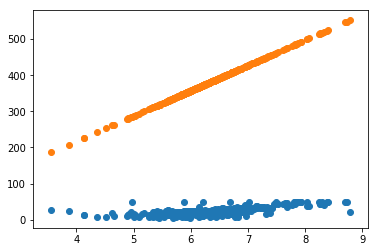

In [4]:
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random = [price(r,k,b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_by_random)

In [6]:
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i,y_hat_i in zip(list(y),list(y_hat))) / len(y)

def partial_k(x,y,y_hat):
    n = len(y)
    gradient = 0
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i / abs(y_i - y_hat_i)
    return gradient

def partial_b(x,y,y_hat):
    n = len(y)
    gradient = 0
    for y_i,y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i - y_hat_i)/ abs(y_i - y_hat_i)
    return gradient

In [23]:
trying_times = 2000
k = random.random() * 200 - 100
b = random.random() * 200 - 100
min_loss = float('inf')
alpha = 0.0001

for i in range(trying_times):
    price_by_random = [price(x,k,b) for x in X_rm]
    current_loss = loss(y,price_by_random)
    if current_loss < min_loss:
        min_loss = current_loss
    if i % 100 ==0:
        print('Round: {}, k: {}, b: {}, loss: {}'.format(i,k,b,current_loss))
            
    gradient_k = partial_k(X_rm,y,price_by_random)
    gradient_b = partial_b(X_rm,y,price_by_random)
    k = k + gradient_k*alpha
    b = b + gradient_b*alpha

Round: 0, k: -48.626156049039835, b: -50.9735079912295, loss: 379.1039267458695
Round: 100, k: -16.82590604903993, b: -45.91350799122922, loss: 174.19098206948658
Round: 200, k: 10.23100775096011, b: -41.60410799122902, loss: 4.440363091915803
Round: 300, k: 10.22786095096018, b: -41.58430799122907, loss: 4.440283605908694
Round: 400, k: 10.22471415096025, b: -41.564507991229114, loss: 4.440204119901574
Round: 500, k: 10.221486550960309, b: -41.54490799122916, loss: 4.440125392950582
Round: 600, k: 10.217635750960321, b: -41.5263079912292, loss: 4.440078875740019
Round: 700, k: 10.216472950960314, b: -41.508107991229245, loss: 4.440000195372016
Round: 800, k: 10.213233350960332, b: -41.490707991229286, loss: 4.43993283685236
Round: 900, k: 10.210189750960382, b: -41.473907991229325, loss: 4.4398784336547275
Round: 1000, k: 10.207803750960437, b: -41.457107991229364, loss: 4.439821437745639
Round: 1100, k: 10.205417750960493, b: -41.4403079912294, loss: 4.439764441836542
Round: 1200, k: